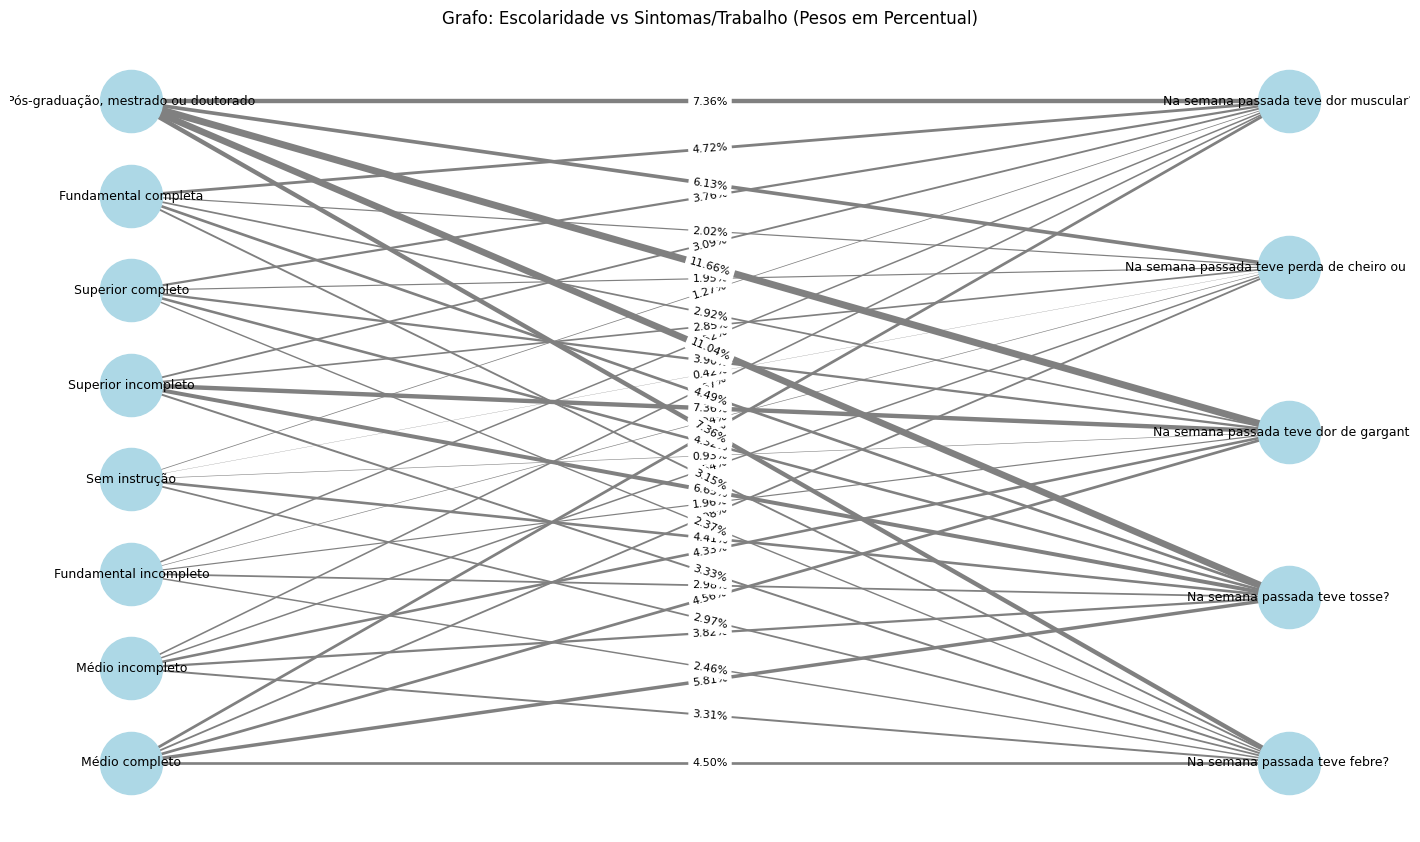

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Caminho do arquivo CSV
url = "../dados-tratados/pc-05.csv"

# Carregando o dataset
df = pd.read_csv(url, sep=";")

# Coluna de Escolaridade
nodo_principal = "Escolaridade"

# Colunas selecionadas para sintomas e trabalho
colunas_direita = [
    "Na semana passada teve febre?",
    "Na semana passada teve tosse?",
    "Na semana passada teve dor de garganta?",
    "Na semana passada teve perda de cheiro ou sabor?",
    "Na semana passada teve dor muscular?"
]

# Criando o grafo bipartido
G = nx.Graph()

# Pegando os diferentes níveis de escolaridade
escolaridades = df[nodo_principal].unique().tolist()

# Adicionando nós ao grafo
G.add_nodes_from(escolaridades, bipartite=0)  # Escolaridade no grupo 0
G.add_nodes_from(colunas_direita, bipartite=1)  # Sintomas/trabalho no grupo 1

# Convertendo "Sim" para 1 e "Não" para 0
df.replace({"Sim": 1, "Não": 0}, inplace=True)

# Contagem total de pessoas por nível de escolaridade
total_por_escolaridade = df[nodo_principal].value_counts().to_dict()

# Criando dicionário para armazenar pesos das arestas
pesos = {}

# Iterando sobre o dataset para somar os pesos das conexões
for _, row in df.iterrows():
    escolaridade = row[nodo_principal]
    for coluna in colunas_direita:
        if coluna in row:
            peso = row[coluna]

            # Verifica se o peso é numérico e válido
            if isinstance(peso, (int, float)) and not pd.isna(peso):
                if (escolaridade, coluna) in pesos:
                    pesos[(escolaridade, coluna)] += peso
                else:
                    pesos[(escolaridade, coluna)] = peso

# Convertendo os pesos para percentual com base na quantidade total de pessoas por escolaridade
pesos_percentuais = {
    (u, v): (peso / total_por_escolaridade[u]) * 100 if total_por_escolaridade[u] > 0 else 0
    for (u, v), peso in pesos.items()
}

# Adicionando as arestas ao grafo
for (u, v), peso in pesos_percentuais.items():
    G.add_edge(u, v, weight=peso)

# Posicionamento dos nós para layout bipartido
pos = {}

# Distribuindo os nós de escolaridade à esquerda (x = 0)
for i, esc in enumerate(escolaridades):
    pos[esc] = (0, i / (len(escolaridades) - 1) if len(escolaridades) > 1 else 0.5)

# Distribuindo os nós de sintomas/trabalho à direita (x = 1)
for i, sint in enumerate(colunas_direita):
    pos[sint] = (1, i / (len(colunas_direita) - 1) if len(colunas_direita) > 1 else 0.5)

# Extraindo pesos das arestas para espessura
edges = G.edges(data=True)
max_peso = max(pesos_percentuais.values()) if pesos_percentuais else 1  # Evita divisão por zero
weights = [edata["weight"] / max_peso * 5 for _, _, edata in edges]  # Normalizando espessura

# Criando rótulos para as arestas com percentuais
edge_labels = {(u, v): f"{d['weight']:.2f}%" for u, v, d in G.edges(data=True)}

# Desenhando o grafo bipartido
plt.figure(figsize=(14, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", edge_color="gray", width=weights, font_size=9)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Grafo: Escolaridade vs Sintomas/Trabalho (Pesos em Percentual)")
plt.show()


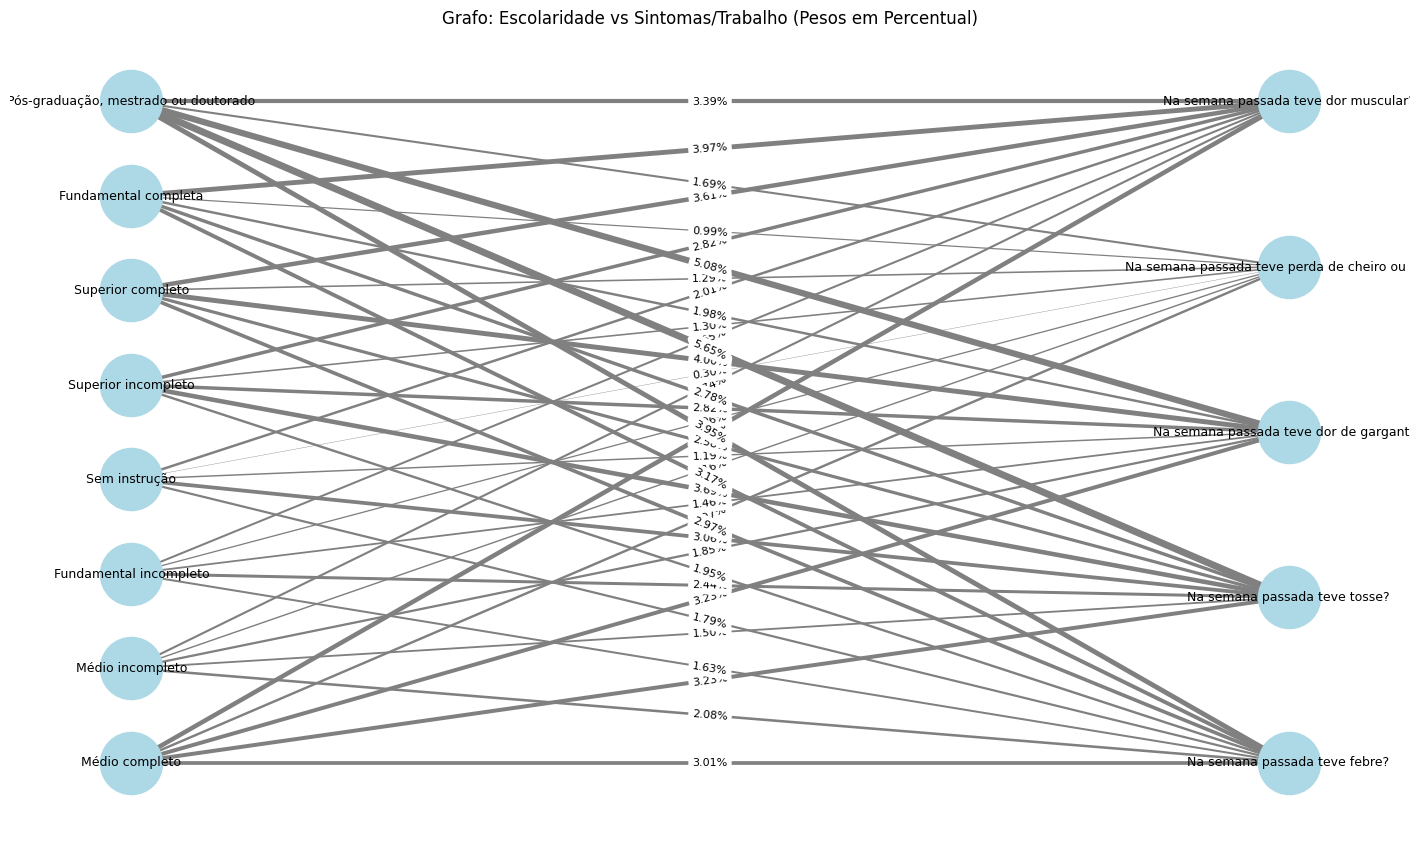

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Caminho do arquivo CSV
url = "../dados-tratados/pc-06.csv"

# Carregando o dataset
df = pd.read_csv(url, sep=";")

# Coluna de Escolaridade
nodo_principal = "Escolaridade"

# Colunas selecionadas para sintomas e trabalho
colunas_direita = [
    "Na semana passada teve febre?",
    "Na semana passada teve tosse?",
    "Na semana passada teve dor de garganta?",
    "Na semana passada teve perda de cheiro ou sabor?",
    "Na semana passada teve dor muscular?"
]

# Criando o grafo bipartido
G = nx.Graph()

# Pegando os diferentes níveis de escolaridade
escolaridades = df[nodo_principal].unique().tolist()

# Adicionando nós ao grafo
G.add_nodes_from(escolaridades, bipartite=0)  # Escolaridade no grupo 0
G.add_nodes_from(colunas_direita, bipartite=1)  # Sintomas/trabalho no grupo 1

# Convertendo "Sim" para 1 e "Não" para 0
df.replace({"Sim": 1, "Não": 0}, inplace=True)

# Contagem total de pessoas por nível de escolaridade
total_por_escolaridade = df[nodo_principal].value_counts().to_dict()

# Criando dicionário para armazenar pesos das arestas
pesos = {}

# Iterando sobre o dataset para somar os pesos das conexões
for _, row in df.iterrows():
    escolaridade = row[nodo_principal]
    for coluna in colunas_direita:
        if coluna in row:
            peso = row[coluna]

            # Verifica se o peso é numérico e válido
            if isinstance(peso, (int, float)) and not pd.isna(peso):
                if (escolaridade, coluna) in pesos:
                    pesos[(escolaridade, coluna)] += peso
                else:
                    pesos[(escolaridade, coluna)] = peso

# Convertendo os pesos para percentual com base na quantidade total de pessoas por escolaridade
pesos_percentuais = {
    (u, v): (peso / total_por_escolaridade[u]) * 100 if total_por_escolaridade[u] > 0 else 0
    for (u, v), peso in pesos.items()
}

# Adicionando as arestas ao grafo
for (u, v), peso in pesos_percentuais.items():
    G.add_edge(u, v, weight=peso)

# Posicionamento dos nós para layout bipartido
pos = {}

# Distribuindo os nós de escolaridade à esquerda (x = 0)
for i, esc in enumerate(escolaridades):
    pos[esc] = (0, i / (len(escolaridades) - 1) if len(escolaridades) > 1 else 0.5)

# Distribuindo os nós de sintomas/trabalho à direita (x = 1)
for i, sint in enumerate(colunas_direita):
    pos[sint] = (1, i / (len(colunas_direita) - 1) if len(colunas_direita) > 1 else 0.5)

# Extraindo pesos das arestas para espessura
edges = G.edges(data=True)
max_peso = max(pesos_percentuais.values()) if pesos_percentuais else 1  # Evita divisão por zero
weights = [edata["weight"] / max_peso * 5 for _, _, edata in edges]  # Normalizando espessura

# Criando rótulos para as arestas com percentuais
edge_labels = {(u, v): f"{d['weight']:.2f}%" for u, v, d in G.edges(data=True)}

# Desenhando o grafo bipartido
plt.figure(figsize=(14, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", edge_color="gray", width=weights, font_size=9)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Grafo: Escolaridade vs Sintomas/Trabalho (Pesos em Percentual)")
plt.show()
